In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#检测GPU可用性
import tensorflow as tf
print('检测显卡可用性:',tf.test.is_gpu_available())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

检测显卡可用性: True


In [2]:
#读取数据
from pandas import DataFrame
import pandas as pd
import os,tqdm
train_path='/kaggle/input/ai-qpmc-open-data/AI量化模型预测挑战赛公开数据/train'    #读入训练数据地址
train_path_list=os.listdir(train_path)
train_data=DataFrame()
for train_file in tqdm.tqdm(train_path_list):
    train_data_file=pd.read_csv(train_path+'/'+train_file)    #读取单个文件数据
    train_data_file['file']=train_file
    train_data=pd.concat([train_data,train_data_file],axis=0,ignore_index=False)

100%|██████████| 1225/1225 [03:10<00:00,  6.43it/s]


In [3]:
#统计项目信息
print('训练集')
train_data.info()

训练集
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448775 entries, 0 to 1998
Data columns (total 33 columns):
 #   Column        Dtype  
---  ------        -----  
 0   uuid          int64  
 1   date          int64  
 2   time          object 
 3   sym           int64  
 4   n_close       float64
 5   amount_delta  float64
 6   n_midprice    float64
 7   n_bid1        float64
 8   n_bsize1      float64
 9   n_bid2        float64
 10  n_bsize2      float64
 11  n_bid3        float64
 12  n_bsize3      float64
 13  n_bid4        float64
 14  n_bsize4      float64
 15  n_bid5        float64
 16  n_bsize5      float64
 17  n_ask1        float64
 18  n_asize1      float64
 19  n_ask2        float64
 20  n_asize2      float64
 21  n_ask3        float64
 22  n_asize3      float64
 23  n_ask4        float64
 24  n_asize4      float64
 25  n_ask5        float64
 26  n_asize5      float64
 27  label_5       int64  
 28  label_10      int64  
 29  label_20      int64  
 30  label_40      int

In [4]:
#统计数据空缺信息
train_data_null=pd.isnull(train_data)
print(train_data_null.sum())

uuid            0
date            0
time            0
sym             0
n_close         0
amount_delta    0
n_midprice      0
n_bid1          0
n_bsize1        0
n_bid2          0
n_bsize2        0
n_bid3          0
n_bsize3        0
n_bid4          0
n_bsize4        0
n_bid5          0
n_bsize5        0
n_ask1          0
n_asize1        0
n_ask2          0
n_asize2        0
n_ask3          0
n_asize3        0
n_ask4          0
n_asize4        0
n_ask5          0
n_asize5        0
label_5         0
label_10        0
label_20        0
label_40        0
label_60        0
file            0
dtype: int64


In [5]:
train_data.head(10)

uuid  date      time  sym   n_close  amount_delta  n_midprice    n_bid1  \
0     0    33  13:10:03    3  0.061404      255041.0    0.059211  0.057018   
1     1    33  13:10:06    3  0.057018       54227.0    0.059211  0.057018   
2     2    33  13:10:09    3  0.061404       41382.0    0.059211  0.057018   
3     3    33  13:10:12    3  0.057018        7230.0    0.059211  0.057018   
4     4    33  13:10:15    3  0.057018           0.0    0.059211  0.057018   
5     5    33  13:10:18    3  0.057018       68685.0    0.059211  0.057018   
6     6    33  13:10:21    3  0.057018        6748.0    0.059211  0.057018   
7     7    33  13:10:24    3  0.057018        9650.0    0.059211  0.057018   
8     8    33  13:10:27    3  0.057018       12050.0    0.059211  0.057018   
9     9    33  13:10:30    3  0.061404         242.0    0.059211  0.057018   

   n_bsize1    n_bid2  ...    n_ask4  n_asize4    n_ask5  n_asize5  label_5  \
0  0.000047  0.052632  ...  0.074561  0.000280  0.078947  0.000149        1   
1  0.000040  0.052632  ...  0.074561  0.000280  0.078947  0.000149        1   
2  0.000038  0.052632  ...  0.074561  0.000280  0.078947  0.000149        1   
3  0.000037  0.052632  ...  0.074561  0.000282  0.078947  0.000149        1   
4  0.000037  0.052632  ...  0.074561  0.000282  0.078947  0.000149        1   
5  0.000027  0.052632  ...  0.074561  0.000282  0.078947  0.000149        1   
6  0.000030  0.052632  ...  0.074561  0.000282  0.078947  0.000149        1   
7  0.000031  0.052632  ...  0.074561  0.000281  0.078947  0.000149        0   
8  0.000023  0.052632  ...  0.074561  0.000281  0.078947  0.000149        0   
9  0.000024  0.052632  ...  0.074561  0.000281  0.078947  0.000149        0   

   label_10  label_20  label_40  label_60                         file  
0         1         0         0         0  snapshot_sym3_date33_pm.csv  
1         1         0         0         0  snapshot_sym3_date33_pm.csv  
2         0         0         0         0  snapshot_sym3_date33_pm.csv  
3         0         0         0         0  snapshot_sym3_date33_pm.csv  
4         0         0         0         0  snapshot_sym3_date33_pm.csv  
5         0         0         0         0  snapshot_sym3_date33_pm.csv  
6         0         0         0         0  snapshot_sym3_date33_pm.csv  
7         0         0         0         0  snapshot_sym3_date33_pm.csv  
8         0         0         0         0  snapshot_sym3_date33_pm.csv  
9         0         0         0         0  snapshot_sym3_date33_pm.csv  

[10 rows x 33 columns]

In [6]:
# 时间相关特征
train_data['hour'] = train_data['time'].apply(lambda x:int(x.split(':')[0]))
train_data['minute'] = train_data['time'].apply(lambda x:int(x.split(':')[1]))
cols_train=[f for f in train_data.columns if f not in ['uuid','time','file']]
Train_Data=train_data.loc[:,cols_train]
Train_Data.head(10)

date  sym   n_close  amount_delta  n_midprice    n_bid1  n_bsize1  \
0    33    3  0.061404      255041.0    0.059211  0.057018  0.000047   
1    33    3  0.057018       54227.0    0.059211  0.057018  0.000040   
2    33    3  0.061404       41382.0    0.059211  0.057018  0.000038   
3    33    3  0.057018        7230.0    0.059211  0.057018  0.000037   
4    33    3  0.057018           0.0    0.059211  0.057018  0.000037   
5    33    3  0.057018       68685.0    0.059211  0.057018  0.000027   
6    33    3  0.057018        6748.0    0.059211  0.057018  0.000030   
7    33    3  0.057018        9650.0    0.059211  0.057018  0.000031   
8    33    3  0.057018       12050.0    0.059211  0.057018  0.000023   
9    33    3  0.061404         242.0    0.059211  0.057018  0.000024   

     n_bid2  n_bsize2    n_bid3  ...  n_asize4    n_ask5  n_asize5  label_5  \
0  0.052632  0.000120  0.048246  ...  0.000280  0.078947  0.000149        1   
1  0.052632  0.000125  0.048246  ...  0.000280  0.078947  0.000149        1   
2  0.052632  0.000132  0.048246  ...  0.000280  0.078947  0.000149        1   
3  0.052632  0.000132  0.048246  ...  0.000282  0.078947  0.000149        1   
4  0.052632  0.000132  0.048246  ...  0.000282  0.078947  0.000149        1   
5  0.052632  0.000132  0.048246  ...  0.000282  0.078947  0.000149        1   
6  0.052632  0.000134  0.048246  ...  0.000282  0.078947  0.000149        1   
7  0.052632  0.000135  0.048246  ...  0.000281  0.078947  0.000149        0   
8  0.052632  0.000135  0.048246  ...  0.000281  0.078947  0.000149        0   
9  0.052632  0.000134  0.048246  ...  0.000281  0.078947  0.000149        0   

   label_10  label_20  label_40  label_60  hour  minute  
0         1         0         0         0    13      10  
1         1         0         0         0    13      10  
2         0         0         0         0    13      10  
3         0         0         0         0    13      10  
4         0         0         0         0    13      10  
5         0         0         0         0    13      10  
6         0         0         0         0    13      10  
7         0         0         0         0    13      10  
8         0         0         0         0    13      10  
9         0         0         0         0    13      10  

[10 rows x 32 columns]

In [7]:
Cols_Train=[label for label in Train_Data.columns if label not in ['label_5','label_10','label_20','label_40','label_60']]
Data_train=train_data.loc[:,Cols_Train]

In [8]:
Data_train.head(10)

date  sym   n_close  amount_delta  n_midprice    n_bid1  n_bsize1  \
0    33    3  0.061404      255041.0    0.059211  0.057018  0.000047   
1    33    3  0.057018       54227.0    0.059211  0.057018  0.000040   
2    33    3  0.061404       41382.0    0.059211  0.057018  0.000038   
3    33    3  0.057018        7230.0    0.059211  0.057018  0.000037   
4    33    3  0.057018           0.0    0.059211  0.057018  0.000037   
5    33    3  0.057018       68685.0    0.059211  0.057018  0.000027   
6    33    3  0.057018        6748.0    0.059211  0.057018  0.000030   
7    33    3  0.057018        9650.0    0.059211  0.057018  0.000031   
8    33    3  0.057018       12050.0    0.059211  0.057018  0.000023   
9    33    3  0.061404         242.0    0.059211  0.057018  0.000024   

     n_bid2  n_bsize2    n_bid3  ...    n_ask2  n_asize2    n_ask3  n_asize3  \
0  0.052632  0.000120  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
1  0.052632  0.000125  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
2  0.052632  0.000132  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
3  0.052632  0.000132  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
4  0.052632  0.000132  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
5  0.052632  0.000132  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
6  0.052632  0.000134  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
7  0.052632  0.000135  0.048246  ...  0.065789  0.000225  0.070175  0.000276   
8  0.052632  0.000135  0.048246  ...  0.065789  0.000224  0.070175  0.000278   
9  0.052632  0.000134  0.048246  ...  0.065789  0.000224  0.070175  0.000278   

     n_ask4  n_asize4    n_ask5  n_asize5  hour  minute  
0  0.074561  0.000280  0.078947  0.000149    13      10  
1  0.074561  0.000280  0.078947  0.000149    13      10  
2  0.074561  0.000280  0.078947  0.000149    13      10  
3  0.074561  0.000282  0.078947  0.000149    13      10  
4  0.074561  0.000282  0.078947  0.000149    13      10  
5  0.074561  0.000282  0.078947  0.000149    13      10  
6  0.074561  0.000282  0.078947  0.000149    13      10  
7  0.074561  0.000281  0.078947  0.000149    13      10  
8  0.074561  0.000281  0.078947  0.000149    13      10  
9  0.074561  0.000281  0.078947  0.000149    13      10  

[10 rows x 27 columns]

In [14]:
#模型评估函数
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_evaluate(Model,X_train,X_test,y_train,y_test):
    y_pred_train=Model.predict(X_train)    #训练集
    Train_precision=precision_score(y_train,y_pred_train,average='macro')
    Train_recall=recall_score(y_train,y_pred_train,average='macro')
    Train_f1=f1_score(y_train,y_pred_train,average='macro')
    Train_accuracy=accuracy_score(y_train,y_pred_train)
    print('模型训练查准率为:{0},查全率为:{1},F1-分数为:{2},精度为:{3}'.format(Train_precision,Train_recall,Train_f1,Train_accuracy))
    y_pred_test=Model.predict(X_test)    #测试集
    Test_precision=precision_score(y_test,y_pred_test,average='macro')
    Test_recall=recall_score(y_test,y_pred_test,average='macro')
    Test_f1=f1_score(y_test,y_pred_test,average='macro')
    Test_accuracy=accuracy_score(y_test,y_pred_test)
    print('模型测试查准率为:{0},查全率为:{1},F1-分数为:{2},精度为:{3}'.format(Test_precision,Test_recall,Test_f1,Test_accuracy))
    #Train_error=1-Model.score(X_train,y_train)
    #Test_error=1-Model.score(X_test,y_test)
    #print('模型训练误差为:{0},测试误差为:{1}'.format(round(Train_error,4),round(Test_error,4)))
    #print(classification_report(y_test,y_pred_test))

In [11]:
#训练label_5
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
Select=SelectKBest(score_func=f_classif,k=15)
Select.fit(Data_train,Train_Data.loc[:,'label_5'])
print('label_5')
print('特征评分重要性:',Select.scores_)
print('特征P-值:',Select.pvalues_)
Data_feature_5=Select.transform(Data_train)
Data_feature_5=DataFrame(Data_feature_5)

label_5
特征评分重要性: [12610.86569519 22508.85726992   619.65606467  2623.07522034
   645.31755363   736.92796574  6270.67172863  1448.45580626
 53971.5079217   2467.50533837 46771.01522593  3745.77377907
 40528.25507347  5240.22694011 33555.98462898  3275.17846154
 16423.70719015  2089.82220066 39739.27512379  1096.79156546
 38183.44512482   402.06475688 34717.70969592    56.94885038
 34876.20559959 10660.65541028   131.88385268]
特征P-值: [0.00000000e+000 0.00000000e+000 9.01292879e-270 0.00000000e+000
 6.54601439e-281 1.12844594e-320 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.59512609e-175 0.00000000e+000 1.85354738e-025
 0.00000000e+000 0.00000000e+000 5.32911450e-058]


In [10]:
#训练label_5
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
#Select=SelectKBest(score_func=f_classif,k=15)
#Select.fit(Data_train,Train_Data.loc[:,'label_5'])
#print('label_5')
#print('特征评分重要性:',Select.scores_)
#print('特征P-值:',Select.pvalues_)
#Data_feature_5=Select.transform(Data_train)
#Data_feature_5=DataFrame(Data_feature_5)
#数据集划分
from sklearn.model_selection import train_test_split
X_train_5,X_test_5,y_train_5,y_test_5=train_test_split(Data_train,Train_Data.loc[:,'label_5'], train_size=0.8, random_state=123, shuffle=True)
print('训练数据集规模:{0},测试数据集规模:{1}'.format(X_train_5.shape,X_test_5.shape))
print('训练数据标签规模:{0},测试数据标签规模{1}'.format(y_train_5.shape,y_test_5.shape))
#载入XGBoost模型
from xgboost import XGBClassifier
Model_XGB_5=XGBClassifier(n_estimators=1000, gpu_id=0, tree_method='gpu_hist')
Model_XGB_5.fit(X_train_5,y_train_5)
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
Model_evaluate(Model_XGB_5, X_train_5, X_test_5, y_train_5, y_test_5)

训练数据集规模:(1959020, 27),测试数据集规模:(489755, 27)
训练数据标签规模:(1959020,),测试数据标签规模(489755,)
模型训练查准率为:0.7290082810340017,查全率为:0.5719260186080273,F1-分数为:0.6179740583642432,精度为:0.7838531510653286
模型测试查准率为:0.6407948592057626,查全率为:0.5130239729457752,F1-分数为:0.546639139656368,精度为:0.7480434094598319
模型训练误差为:0.2161,测试误差为:0.252
              precision    recall  f1-score   support

           0       0.57      0.30      0.39     73086
           1       0.78      0.94      0.85    343962
           2       0.57      0.31      0.40     72707

    accuracy                           0.75    489755
   macro avg       0.64      0.51      0.55    489755
weighted avg       0.72      0.75      0.72    489755



In [11]:
#训练label_10
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
#Select_10=SelectKBest(score_func=f_classif,k=15)
#Select_10.fit(Data_train,Train_Data.loc[:,'label_10'])
#print('label_10')
#print('特征评分重要性:',Select_10.scores_)
#print('特征P-值:',Select_10.pvalues_)
#Data_feature_10=Select_10.transform(Data_train)
#Data_feature_10=DataFrame(Data_feature_10)
#数据集划分
from sklearn.model_selection import train_test_split
X_train_10,X_test_10,y_train_10,y_test_10=train_test_split(Data_train,Train_Data.loc[:,'label_10'], train_size=0.8, random_state=123, shuffle=True)
print('训练数据集规模:{0},测试数据集规模:{1}'.format(X_train_10.shape,X_test_10.shape))
print('训练数据标签规模:{0},测试数据标签规模{1}'.format(y_train_10.shape,y_test_10.shape))
#载入XGBoost模型
from xgboost import XGBClassifier
Model_XGB_10=XGBClassifier(n_estimators=1000, gpu_id=0, tree_method='gpu_hist')
Model_XGB_10.fit(X_train_10,y_train_10)
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
Model_evaluate(Model_XGB_10, X_train_10, X_test_10, y_train_10, y_test_10)

训练数据集规模:(1959020, 27),测试数据集规模:(489755, 27)
训练数据标签规模:(1959020,),测试数据标签规模(489755,)
模型训练查准率为:0.7114800381789986,查全率为:0.6427138004375613,F1-分数为:0.6671810746771113,精度为:0.740755581872569
模型测试查准率为:0.6508586324406217,查全率为:0.5906563045595498,F1-分数为:0.6107942187672751,精度为:0.6997764188216558
模型训练误差为:0.2592,测试误差为:0.3002
              precision    recall  f1-score   support

           0       0.61      0.45      0.52    102248
           1       0.74      0.88      0.80    286975
           2       0.61      0.44      0.51    100532

    accuracy                           0.70    489755
   macro avg       0.65      0.59      0.61    489755
weighted avg       0.69      0.70      0.68    489755



In [12]:
#xunlian20
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
#Select_20=SelectKBest(score_func=f_classif,k=15)
#Select_20.fit(Data_train,Train_Data.loc[:,'label_20'])
#print('label_20')
#print('特征评分重要性:',Select_20.scores_)
#print('特征P-值:',Select_20.pvalues_)
#Data_feature_20=Select_20.transform(Data_train)
#Data_feature_20=DataFrame(Data_feature_20)
#数据集划分
from sklearn.model_selection import train_test_split
X_train_20,X_test_20,y_train_20,y_test_20=train_test_split(Data_train,Train_Data.loc[:,'label_20'], train_size=0.8, random_state=123, shuffle=True)
print('训练数据集规模:{0},测试数据集规模:{1}'.format(X_train_20.shape,X_test_20.shape))
print('训练数据标签规模:{0},测试数据标签规模{1}'.format(y_train_20.shape,y_test_20.shape))
#载入XGBoost模型
from xgboost import XGBClassifier
Model_XGB_20=XGBClassifier(n_estimators=1000,tree_method='gpu_hist')
Model_XGB_20.fit(X_train_20,y_train_20)
Model_evaluate(Model_XGB_20, X_train_20, X_test_20, y_train_20, y_test_20)

训练数据集规模:(1959020, 27),测试数据集规模:(489755, 27)
训练数据标签规模:(1959020,),测试数据标签规模(489755,)
模型训练查准率为:0.7861268799410172,查全率为:0.6344432908644181,F1-分数为:0.6831327715826605,精度为:0.7977539790303315
模型测试查准率为:0.7264037828628855,查全率为:0.5865783728541126,F1-分数为:0.6285942096596109,精度为:0.7671345877020143
模型训练误差为:0.2022,测试误差为:0.2329
              precision    recall  f1-score   support

           0       0.70      0.41      0.52     80986
           1       0.78      0.94      0.86    327928
           2       0.70      0.40      0.51     80841

    accuracy                           0.77    489755
   macro avg       0.73      0.59      0.63    489755
weighted avg       0.76      0.77      0.74    489755



In [15]:
#训练label_40
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
#Select_40=SelectKBest(score_func=f_classif,k=15)
#Select_40.fit(Data_train,Train_Data.loc[:,'label_40'])
#print('label_40')
#print('特征评分重要性:',Select_40.scores_)
#print('特征P-值:',Select_40.pvalues_)
#Data_feature_40=Select_40.transform(Data_train)
#Data_feature_40=DataFrame(Data_feature_40)
#数据集划分
from sklearn.model_selection import train_test_split
X_train_40,X_test_40,y_train_40,y_test_40=train_test_split(Data_train,Train_Data.loc[:,'label_40'], train_size=0.8, random_state=123, shuffle=True)
print('训练数据集规模:{0},测试数据集规模:{1}'.format(X_train_40.shape,X_test_40.shape))
print('训练数据标签规模:{0},测试数据标签规模{1}'.format(y_train_40.shape,y_test_40.shape))
#载入XGBoost模型
from xgboost import XGBClassifier
Model_XGB_40=XGBClassifier(n_estimators=1000,tree_method='gpu_hist')
Model_XGB_40.fit(X_train_40,y_train_40)
Model_evaluate(Model_XGB_40, X_train_40, X_test_40, y_train_40, y_test_40)

训练数据集规模:(1959020, 27),测试数据集规模:(489755, 27)
训练数据标签规模:(1959020,),测试数据标签规模(489755,)
模型训练查准率为:0.7810403567396934,查全率为:0.7299839334020385,F1-分数为:0.7497054502107982,精度为:0.7812768629212565
模型测试查准率为:0.7404724741596306,查全率为:0.6911202953630502,F1-分数为:0.7095675923615472,精度为:0.7480025727149289


In [16]:
#xunlian60
from pandas import DataFrame
from sklearn.feature_selection import SelectKBest,f_classif
#Select_60=SelectKBest(score_func=f_classif,k=15)
#Select_60.fit(Data_train,Train_Data.loc[:,'label_60'])
#print('label_20')
#print('特征评分重要性:',Select_60.scores_)
#print('特征P-值:',Select_60.pvalues_)
#Data_feature_60=Select_60.transform(Data_train)
#Data_feature_60=DataFrame(Data_feature_60)
#数据集划分
from sklearn.model_selection import train_test_split
X_train_60,X_test_60,y_train_60,y_test_60=train_test_split(Data_train,Train_Data.loc[:,'label_60'], train_size=0.8, random_state=123, shuffle=True)
print('训练数据集规模:{0},测试数据集规模:{1}'.format(X_train_60.shape,X_test_60.shape))
print('训练数据标签规模:{0},测试数据标签规模{1}'.format(y_train_60.shape,y_test_60.shape))
#载入XGBoost模型
from xgboost import XGBClassifier
Model_XGB_60=XGBClassifier(n_estimators=1000,tree_method='gpu_hist')
Model_XGB_60.fit(X_train_60,y_train_60)
Model_evaluate(Model_XGB_60, X_train_60, X_test_60, y_train_60, y_test_60)

训练数据集规模:(1959020, 27),测试数据集规模:(489755, 27)
训练数据标签规模:(1959020,),测试数据标签规模(489755,)
模型训练查准率为:0.79491807799876,查全率为:0.7810463144312045,F1-分数为:0.7870254398009197,精度为:0.7952603852946881
模型测试查准率为:0.7629417622949566,查全率为:0.748684266333444,F1-分数为:0.7546876116869347,精度为:0.7649294034772488


训练深度神经网络

In [13]:
#构建神经网络输入数据集
DL_train_Data=Data_feature_5.iloc[:2000000,:]
DL_valid_Data=Data_feature_5.iloc[2000000:2200000,:]
DL_test_Data=Data_feature_5.iloc[2200000:,:]
Target_5=Train_Data.loc[:,'label_5']
DL_train_target=Target_5[:2000000]
DL_valid_target=Target_5[2000000:2200000]
DL_test_target=Target_5[2200000:]
print('训练数据集:{0},验证数据集:{1},测试数据集:{2}'.format(DL_train_Data.shape,DL_valid_Data.shape,DL_test_Data.shape))
print('训练数据集标签:{0},验证数据集标签:{1},测试数据集标签:{2}'.format(DL_train_target.shape,DL_valid_target.shape,DL_test_target.shape))

训练数据集:(2000000, 15),验证数据集:(200000, 15),测试数据集:(248775, 15)
训练数据集标签:(2000000,),验证数据集标签:(200000,),测试数据集标签:(248775,)


In [18]:
#保存机器学习模型
import joblib
Model_list=['Model_XGB_5','Model_XGB_10','Model_XGB_20','Model_XGB_40','Model_XGB_60']
try:
    for model in Model_list:
        joblib.dump(eval(model),model+'.pkl')
    print('模型保存成功!')
except :
    print('模型保存失败!')

模型保存成功!


In [14]:
#接入数据输入流
from tensorflow import keras
Train_input_5=tf.data.Dataset.from_tensor_slices((DL_train_Data,DL_train_target))    #训练集
Train_input_5=Train_input_5.repeat(1).shuffle(10000)
Train_input_5=Train_input_5.batch(100).prefetch(tf.data.experimental.AUTOTUNE)
Valid_input_5=tf.data.Dataset.from_tensor_slices((DL_valid_Data,DL_valid_target))    #验证集
Valid_input_5=Valid_input_5.repeat(1).shuffle(10000)
Valid_input_5=Valid_input_5.batch(100).prefetch(tf.data.experimental.AUTOTUNE)
Test_input_5=tf.data.Dataset.from_tensor_slices((DL_test_Data,DL_test_target))    #测试集
Test_input_5=Test_input_5.repeat(1).shuffle(10000)
Test_input_5=Test_input_5.batch(100).prefetch(tf.data.experimental.AUTOTUNE)

In [15]:
#构建神经网络模型
from tensorflow import keras
Deep_Network=keras.models.Sequential()
Deep_Network.add(keras.layers.Flatten(input_shape=DL_train_Data.shape[1:],name='Input_Layer'))
Deep_Network.add(keras.layers.Dense(300,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.Dense(300,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(200,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.Dense(200,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(50,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(25,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(18,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(9,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.BatchNormalization())
Deep_Network.add(keras.layers.Dense(6,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),kernel_constraint=keras.constraints.max_norm(1)))
Deep_Network.add(keras.layers.Dense(3,activation='softmax',name='Out_Layer'))
Deep_Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 15)                0         
                                                                 
 dense (Dense)               (None, 300)               4800      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                        

In [16]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data
 
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)
 
        _val_f1 = f1_score(val_targ, val_predict, average='macro')
        _val_recall = recall_score(val_targ, val_predict, average='macro')
        _val_precision = precision_score(val_targ, val_predict, average='macro')
 
        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

In [20]:
#模型编译
Train_epoch=10
Check_Point= tf.keras.callbacks.ModelCheckpoint('Deep_Network.h5',
                                                 monitor='val_f1', 
                                                 mode='max', verbose=2,
                                                 save_best_only=True,
                                                 save_weights_only=True)
Lr_scheduler1=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)    #学习率性能调度
Early_Stopping=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
Deep_Network.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])
Deep_Network_history=Deep_Network.fit(Train_input_5,epochs=Train_epoch,validation_data=Valid_input_5,callbacks=[Check_Point,Early_Stopping])

Epoch 1/10
20000/20000 [==============================] - 309s 15ms/step - loss: 1.0598 - accuracy: 0.7068 - val_loss: 1.1290 - val_accuracy: 0.6855
Epoch 2/10
20000/20000 [==============================] - 292s 15ms/step - loss: 1.0614 - accuracy: 0.7068 - val_loss: 1.1729 - val_accuracy: 0.6855
Epoch 3/10
20000/20000 [==============================] - 298s 15ms/step - loss: 1.0614 - accuracy: 0.7068 - val_loss: 1.1659 - val_accuracy: 0.6855
Epoch 4/10
20000/20000 [==============================] - 295s 15ms/step - loss: 1.0615 - accuracy: 0.7068 - val_loss: 1.0829 - val_accuracy: 0.6855
Epoch 5/10
20000/20000 [==============================] - 289s 14ms/step - loss: 1.0615 - accuracy: 0.7068 - val_loss: 1.1218 - val_accuracy: 0.6855
Epoch 6/10
20000/20000 [==============================] - 289s 14ms/step - loss: 1.0615 - accuracy: 0.7068 - val_loss: 1.0358 - val_accuracy: 0.6855
Epoch 7/10
20000/20000 [==============================] - 286s 14ms/step - loss: 1.0615 - accuracy: 0.7068

In [22]:
Deep_Network.save('Deep_Network.h5')    #保存模型

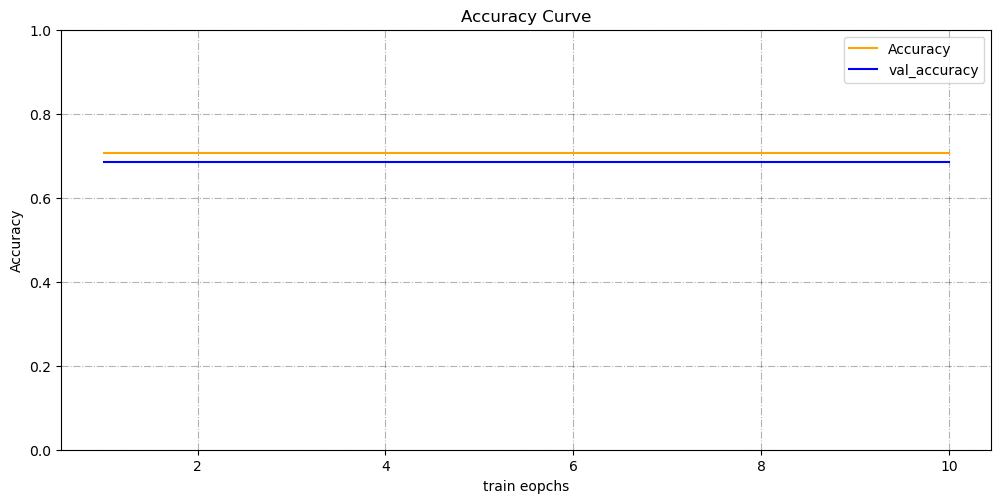

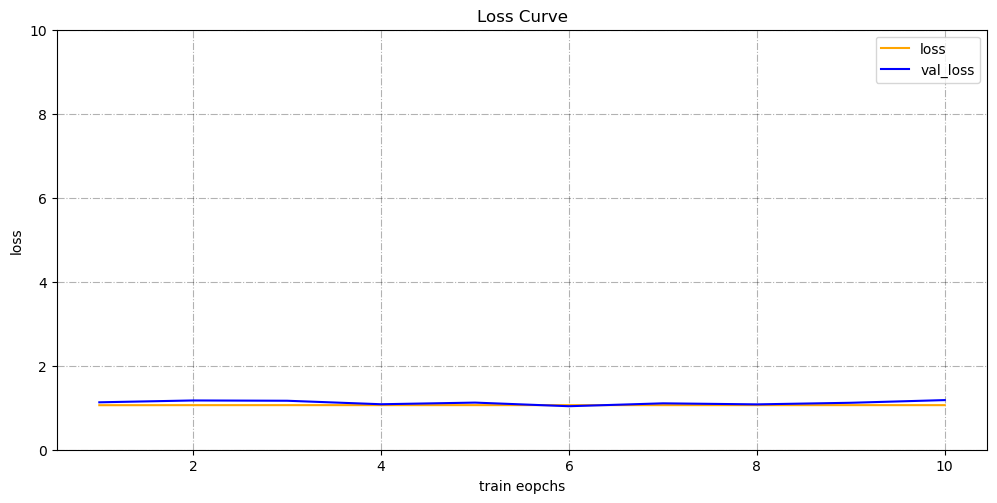

In [27]:
#绘制模型训练曲线
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
Train_history=DataFrame(Deep_Network_history.history)
Train_history.head(10)
fig9=plt.figure(figsize=(12,12))
ax91=fig9.add_subplot(211)
ax91.set_title('Accuracy Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax91.plot(np.arange(1,Train_epoch+1),Train_history.loc[:,'accuracy'],color='orange',label='Accuracy')
ax91.plot(np.arange(1,Train_epoch+1),Train_history.loc[:,'val_accuracy'],color='blue',label='val_accuracy')
#ax91.plot(np.arange(1,Train_epoch+1),Train_history.loc[:,'lr'],color='green',label='lr')
ax91.set_xlabel('train eopchs')
ax91.set_ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()
fig10=plt.figure(figsize=(12,12))
ax10=fig10.add_subplot(211)
ax10.set_title('Loss Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax10.plot(np.arange(1,Train_epoch+1),Train_history.loc[:,'loss'],color='orange',label='loss')
ax10.plot(np.arange(1,Train_epoch+1),Train_history.loc[:,'val_loss'],color='blue',label='val_loss')
ax10.set_xlabel('train eopchs')
ax10.set_ylabel('loss')
plt.ylim(0,10)
plt.legend()
plt.show()

In [29]:
#定义模型评价指标
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_evaluate_Deep(model,X_train,y_train,X_test,y_test):
    Target_list=np.array([0,1,2])    
    Pred_test=model.predict(X_test)    #测试数据整理
    Pred_target_test=[]
    for target_i in np.arange(0,len(X_test)):
        Proba_list=Pred_test[target_i]
        Target_test=Target_list[np.argmax(Proba_list)]
        Pred_target_test.append(Target_test)    #测试数据预测结果归一化列表
    Pred_train=model.predict(X_train)    #训练数据整理
    Pred_target_train=[]
    for target_i_train in np.arange(0,len(X_train)):
        Proba_list_train=Pred_train[target_i_train]
        Target_train=Target_list[np.argmax(Proba_list_train)]
        Pred_target_train.append(Target_train)    #训练数据预测结果归一化列表
    precision_train=precision_score(y_train,Pred_target_train,average='macro',labels=[0,1,2])
    recall_train=recall_score(y_train,Pred_target_train,average='macro',labels=[0,1,2])
    f1_train=f1_score(y_train,Pred_target_train,average='macro',labels=[0,1,2])
    accuracy_train=accuracy_score(y_train,Pred_target_train)
    print('模型训练准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_train,recall_train,f1_train,accuracy_train))
    precision_test=precision_score(y_test,Pred_target_test,average='macro',labels=[0,1,2])
    recall_test=recall_score(y_test,Pred_target_test,average='macro',labels=[0,1,2])
    f1_test=f1_score(y_test,Pred_target_test,average='macro',labels=[0,1,2])
    accuracy_test=accuracy_score(y_test,Pred_target_test)
    print('模型测试准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_test,recall_test,f1_test,accuracy_test))
    print(classification_report(y_test,Pred_target_test))
Model_evaluate_Deep(Deep_Network,DL_train_Data, list(DL_train_target),DL_test_Data,list(DL_test_target)) 

62500/62500 [==============================] - 153s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


模型训练准确率为:0.23558583333333336,召回率为:0.3333333333333333,f1分数为:0.27606245566031884,精度为:0.7067575


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


模型测试准确率为:0.2271543898435668,召回率为:0.3333333333333333,f1分数为:0.2701865779278008,精度为:0.6814631695307004


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39650
           1       0.68      1.00      0.81    169531
           2       0.00      0.00      0.00     39594

    accuracy                           0.68    248775
   macro avg       0.23      0.33      0.27    248775
weighted avg       0.46      0.68      0.55    248775



数据推理

In [33]:
#读推理数据
test_path='/kaggle/input/ai-qpmc-open-data/AI量化模型预测挑战赛公开数据/test'    #读入测数据集地址
test_path_list=os.listdir(test_path)
test_data=DataFrame()
for test_file in tqdm.tqdm(test_path_list):
    test_data_file=pd.read_csv(test_path+'/'+test_file)
    test_data_file['name']=test_file
    test_data=pd.concat([test_data,test_data_file],axis=0,ignore_index=False)

100%|██████████| 296/296 [00:13<00:00, 22.35it/s]


In [34]:
# 时间相关特征
test_data['hour'] = test_data['time'].apply(lambda x:int(x.split(':')[0]))
test_data['minute'] = test_data['time'].apply(lambda x:int(x.split(':')[1]))
cols_test=[f for f in test_data.columns if f not in ['uuid','time','name']]
Test_Data=test_data.loc[:,cols_test]
Test_Data.head(10)

date  sym   n_close  amount_delta  n_midprice    n_bid1  n_bsize1  \
0    73    3 -0.039568        5874.0   -0.041367 -0.043165  0.000124   
1    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000124   
2    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000124   
3    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000127   
4    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000128   
5    73    3 -0.039568        2136.0   -0.041367 -0.043165  0.000128   
6    73    3 -0.039568       13350.0   -0.041367 -0.043165  0.000128   
7    73    3 -0.039568        5872.0   -0.041367 -0.043165  0.000128   
8    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000128   
9    73    3 -0.039568           0.0   -0.041367 -0.043165  0.000128   

     n_bid2  n_bsize2   n_bid3  ...    n_ask2  n_asize2    n_ask3  n_asize3  \
0 -0.046763  0.000234 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
1 -0.046763  0.000234 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
2 -0.046763  0.000234 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
3 -0.046763  0.000234 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
4 -0.046763  0.000234 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
5 -0.046763  0.000237 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
6 -0.046763  0.000237 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
7 -0.046763  0.000237 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
8 -0.046763  0.000237 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   
9 -0.046763  0.000237 -0.05036  ... -0.035971  0.000057 -0.032374  0.000064   

     n_ask4  n_asize4   n_ask5  n_asize5  hour  minute  
0 -0.028777  0.000118 -0.02518   0.00008    13      10  
1 -0.028777  0.000118 -0.02518   0.00008    13      10  
2 -0.028777  0.000118 -0.02518   0.00008    13      10  
3 -0.028777  0.000118 -0.02518   0.00008    13      10  
4 -0.028777  0.000118 -0.02518   0.00008    13      10  
5 -0.028777  0.000118 -0.02518   0.00008    13      10  
6 -0.028777  0.000118 -0.02518   0.00008    13      10  
7 -0.028777  0.000118 -0.02518   0.00008    13      10  
8 -0.028777  0.000118 -0.02518   0.00008    13      10  
9 -0.028777  0.000118 -0.02518   0.00008    13      10  

[10 rows x 27 columns]

In [35]:
Pred_Data=DataFrame(test_data['uuid'])
Pred_Data=pd.concat([Pred_Data,test_data['name']],axis=1,ignore_index=False)

In [35]:
Data_feature_5_test=Select.transform(Test_Data)    #label_5
Data_feature_5_test=DataFrame(Data_feature_5_test)
Target_list=np.array([0,1,2])    
Pred_test=Deep_Network.predict(Data_feature_5_test)    #测试数据整理
Pred_target_test=[]
for target_i in np.arange(0,len(Data_feature_5_test)):
    Proba_list=Pred_test[target_i]
    Target_test=Target_list[np.argmax(Proba_list)]
    Pred_target_test.append(Target_test)    #测试数据预测结果归一化列表
Pred_Data['label_5']=Pred_target_test

18491/18491 [==============================] - 44s 2ms/step


In [30]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448775 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          int64  
 1   sym           int64  
 2   n_close       float64
 3   amount_delta  float64
 4   n_midprice    float64
 5   n_bid1        float64
 6   n_bsize1      float64
 7   n_bid2        float64
 8   n_bsize2      float64
 9   n_bid3        float64
 10  n_bsize3      float64
 11  n_bid4        float64
 12  n_bsize4      float64
 13  n_bid5        float64
 14  n_bsize5      float64
 15  n_ask1        float64
 16  n_asize1      float64
 17  n_ask2        float64
 18  n_asize2      float64
 19  n_ask3        float64
 20  n_asize3      float64
 21  n_ask4        float64
 22  n_asize4      float64
 23  n_ask5        float64
 24  n_asize5      float64
 25  hour          int64  
 26  minute        int64  
dtypes: float64(23), int64(4)
memory usage: 523.1 MB


In [31]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591704 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          591704 non-null  int64  
 1   sym           591704 non-null  int64  
 2   n_close       591704 non-null  float64
 3   amount_delta  591704 non-null  float64
 4   n_midprice    591704 non-null  float64
 5   n_bid1        591704 non-null  float64
 6   n_bsize1      591704 non-null  float64
 7   n_bid2        591704 non-null  float64
 8   n_bsize2      591704 non-null  float64
 9   n_bid3        591704 non-null  float64
 10  n_bsize3      591704 non-null  float64
 11  n_bid4        591704 non-null  float64
 12  n_bsize4      591704 non-null  float64
 13  n_bid5        591704 non-null  float64
 14  n_bsize5      591704 non-null  float64
 15  n_ask1        591704 non-null  float64
 16  n_asize1      591704 non-null  float64
 17  n_ask2        591704 non-null  float64
 18  n_asiz

In [36]:
#执行推理
#Data_feature_5_test=Select.transform(Test_Data)    #label_5
#Data_feature_5_test=DataFrame(Data_feature_5_test)
label_5_pred=Model_XGB_5.predict(Test_Data)
Pred_Data['label_5']=label_5_pred
#Data_feature_10_test=Select_10.transform()    #label_10
#Data_feature_10_test=DataFrame(Data_feature_10_test)
label_10_pred=Model_XGB_10.predict(Test_Data)
Pred_Data['label_10']=label_10_pred
#Data_feature_20_test=Select_20.transform(Test_Data)    #label_20
#Data_feature_20_test=DataFrame(Data_feature_20_test)
label_20_pred=Model_XGB_20.predict(Test_Data)
Pred_Data['label_20']=label_20_pred
#Data_feature_40_test=Select_40.transform(Test_Data)    #label_40
#Data_feature_40_test=DataFrame(Data_feature_40_test)
label_40_pred=Model_XGB_40.predict(Test_Data)
Pred_Data['label_40']=label_40_pred
#Data_feature_60_test=Select_60.transform(Test_Data)    #label_60
#Data_feature_60_test=DataFrame(Data_feature_60_test)
label_60_pred=Model_XGB_60.predict(Test_Data)
Pred_Data['label_60']=label_60_pred

In [37]:
Pred_Data.head(10)

uuid                         name  label_5  label_10  label_20  label_40  \
0     0  snapshot_sym3_date73_pm.csv        1         2         2         2   
1     1  snapshot_sym3_date73_pm.csv        1         2         2         2   
2     2  snapshot_sym3_date73_pm.csv        1         2         2         2   
3     3  snapshot_sym3_date73_pm.csv        1         2         2         2   
4     4  snapshot_sym3_date73_pm.csv        1         2         2         2   
5     5  snapshot_sym3_date73_pm.csv        1         2         2         2   
6     6  snapshot_sym3_date73_pm.csv        2         2         2         2   
7     7  snapshot_sym3_date73_pm.csv        2         2         2         2   
8     8  snapshot_sym3_date73_pm.csv        2         2         2         2   
9     9  snapshot_sym3_date73_pm.csv        2         2         2         2   

   label_60  
0         2  
1         2  
2         2  
3         2  
4         2  
5         2  
6         2  
7         2  
8         2  
9         2

In [38]:
# 指定输出文件夹路径
output_dir = './submit-2'
# 如果文件夹不存在则创建
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# 首先按照'file'字段对 dataframe 进行分组
grouped = Pred_Data.groupby('name')
# 对于每一个group进行处理
for file_name, group in grouped:
    # 选择你所需要的列
    selected_cols = group[['uuid', 'label_5', 'label_10', 'label_20', 'label_40', 'label_60']]
    # 将其保存为csv文件，file_name作为文件名
    selected_cols.to_csv(os.path.join(output_dir, f'{file_name}'), index=False)

In [39]:
# 现在就可以得到答案的压缩包啦~~~
_ = !zip -r submit-2.zip submit-2/